In [24]:
import os
import pandas as pd
import numpy as np
from skimage.data import imread
import matplotlib.pyplot as plt

In [31]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [4]:
train_segs = pd.read_csv(os.path.join("./datasets/train/train_ship_segmentations.csv"))
val_segs = pd.read_csv(os.path.join("./datasets/val/val_ship_segmentations.csv"))

In [34]:
ImageId = "00021ddc3.jpg"
img_masks = train_segs.loc[train_segs['ImageId'] == ImageId, 'EncodedPixels'].tolist()

In [37]:
len(train_segs.ImageId.unique())

25093

In [35]:
shape = [768,768]
all_masks = np.zeros(shape)
for mask in img_masks:
    all_masks += rle_decode(mask, shape)

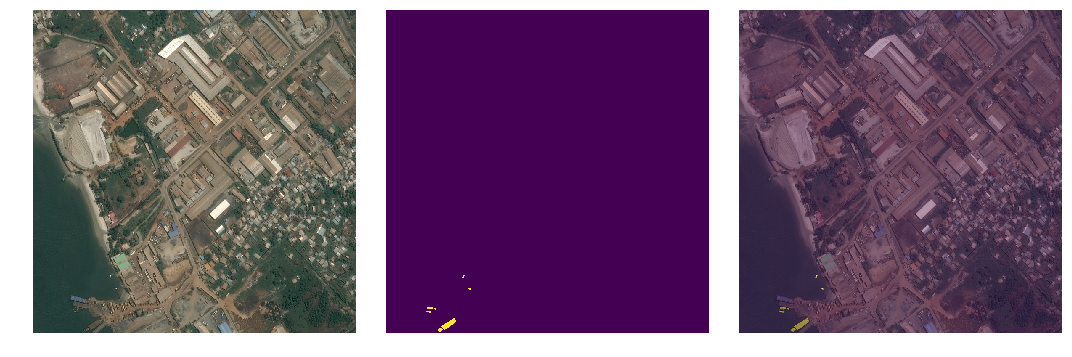

In [36]:
img = imread('./datasets/train/' + ImageId)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()